In [1]:
!pip install pandas matplotlib seaborn scikit-learn numpy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: mermaid 0.3.2 has a non-standard dependency specifier torch>=1.7torchvision. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mermaid or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

In [3]:
df = pd.read_csv("data/lego_sets.csv")

In [4]:
df

,Details,Pricing,Quick Buy,Set Predictions,Set Facts,Subtheme Analysis
0,001-1,C$6.68,~C$615.16,C$641.65,Set Facts\nThe set was only available in the U...,82
1,Gears,C$597.24,C$578.69 (ES),C$779.64,NaN,1961 - 1975
2,Samsonite,+8837.37%,NaN,NaN,NaN,+7.02% (this set +8.06%)
3,Basic Set,+8.06%,NaN,NaN,NaN,NaN
4,1965,C$47.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74,Samsonite,+3856.57%,NaN,NaN,NaN,+7.02% (this set +6.44%)
75,Basic Set,+6.44%,NaN,NaN,NaN,NaN
76,1965,1.07%,NaN,NaN,NaN,NaN
77,Retired,C$60.75,NaN,NaN,NaN,NaN


In [5]:

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values in other columns
df['Pricing'] = df['Pricing'].fillna(0)

# Convert "Details" column to string data type
df['Details'] = df['Details'].astype(str)

# Standardize currency values to USD
# Ensure the column containing currency values exists and has the correct name
if 'Pricing' in df.columns:
    # Remove currency symbols and any other non-numeric characters
    df['Pricing'] = df['Pricing'].str.replace('[^\d.]', '', regex=True)
    # Convert to float
    df['Pricing'] = pd.to_numeric(df['Pricing'], errors='coerce')


if 'Set Predictions' in df.columns:
    df['Set Predictions'] = df['Set Predictions'].astype(str)
    df['Set Predictions'].fillna('', inplace=True)
    df['Set Predictions'] = df['Set Predictions'].str.replace('[^\d.]', '', regex=True)
    df['Set Predictions'] = pd.to_numeric(df['Set Predictions'], errors='coerce')

# Drop irrelevant columns
df.drop(['Subtheme Analysis'], axis=1, inplace=True)

# Rename columns for clarity
df.rename(columns={'Details': 'Set Number', 'Set Facts': 'Facts'}, inplace=True)

# Remove leading and trailing whitespace from the "Facts" column
df['Facts'] = df['Facts'].str.strip().replace('\n', '', regex=True)

# Replace non-numeric characters in "Quick Buy" with empty strings
if 'Quick Buy' in df.columns and df['Quick Buy'].dtype == 'object':
    df['Quick Buy'] = df['Quick Buy'].str.replace('[^\d.]', '', regex=True)

# Convert "Quick Buy" column to numeric, coercing errors to NaN
if 'Quick Buy' in df.columns:
    df['Quick Buy'] = pd.to_numeric(df['Quick Buy'], errors='coerce')

# Drop rows with NaN values in the "Quick Buy" column
df.dropna(subset=['Quick Buy'], inplace=True)

# Find the Lego set with the lowest price in the "Quick Buy" section
if 'Quick Buy' in df.columns:
    lowest_price_set = df.loc[df['Quick Buy'].idxmin()]

# Display the DataFrame
df

,Set Number,Pricing,Quick Buy,Set Predictions,Facts
0,001-1,6.68,615.16,641.65,Set FactsThe set was only available in the Uni...
1,Gears,597.24,578.69,779.64,NaN
8,0011-2,6.06,95.00,97.54,No set facts available
27,0012-1,2.69,337.49,486.70,Set FactsThis minifigure is the most common Cl...
63,0016-1,4.04,755.68,795.93,No set facts available
72,002-1,6.68,272.33,280.10,Set FactsThe set was only available in the Uni...


In [6]:
# Display the Lego set with the lowest price
print("Lego set with the lowest price in the 'Quick Buy' section:")
lowest_price_set

Lego set with the lowest price in the 'Quick Buy' section:


Set Number                         0011-2
Pricing                              6.06
Quick Buy                            95.0
Set Predictions                     97.54
Facts              No set facts available
Name: 8, dtype: object

In [7]:
highest_price_set = df.loc[df['Quick Buy'].idxmax()]
print("Lego set with the highest price in the 'Quick Buy' section:")
highest_price_set

Lego set with the highest price in the 'Quick Buy' section:


Set Number                         0016-1
Pricing                              4.04
Quick Buy                          755.68
Set Predictions                    795.93
Facts              No set facts available
Name: 63, dtype: object

In [8]:
# Find the average price of all Lego sets in the "Pricing" section
average_price = df['Pricing'].mean()
print(f"The average price of all Lego sets in the 'Pricing' section is ${average_price:.2f}.")
average_price

The average price of all Lego sets in the 'Pricing' section is $103.90.


103.89833333333331

In [9]:
df_0011 = pd.read_csv("data/001-1_history.csv")

In [10]:
df_0011

,Date,Value,Currency Value,Status,Description
0,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
1,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
2,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
3,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
4,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
...,...,...,...,...,...
81,2024-02-28 00:00:00,597.24,C$597.24,Today C$597.24,Today\
82,2024-08-28 00:00:00,620.17,C$622.66,Estimate,Estimated value of this set
83,2025-02-28 00:00:00,663.50,NaN,NaN,NaN
84,2026-02-28 00:00:00,701.78,NaN,NaN,NaN


In [11]:
# Step 1: Remove duplicate rows
df_0011.drop_duplicates(inplace=True)

# Step 2: Handle missing values in the 'Currency Value' column
df_0011['Currency Value'] = df_0011['Currency Value'].fillna(0)

# Step 3: Standardize currency values to USD
# Remove currency symbols and any other non-numeric characters
df_0011['Currency Value'] = df_0011['Currency Value'].str.replace('[^\d.]', '', regex=True)
# Convert to float
df_0011['Currency Value'] = pd.to_numeric(df_0011['Currency Value'], errors='coerce')

# Step 4: Drop unnecessary columns
df_0011.drop(['Value', 'Status'], axis=1, inplace=True)

df_0011['Date'] = pd.to_datetime(df_0011['Date'], errors='coerce')

# Step 5: Rename columns for clarity
df_0011.rename(columns={'Currency Value': 'USD Value', 'Description': 'Set Description'}, inplace=True)

# remove NAN values
df_0011['USD Value'] = df_0011['USD Value'].fillna(0)

df_0011 = df_0011[df_0011['USD Value'] != 0]

# remove nan values description remplace by ''
df_0011['Set Description'] = df_0011['Set Description'].fillna('')

df_0011

/tmp/ipykernel_426510/3503219533.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0011['Set Description'] = df_0011['Set Description'].fillna('')


,Date,USD Value,Set Description
0,1965-03-01,6.68,Set 001-1 was released
5,2016-06-28,67.50,
6,2018-03-22,108.00,
7,2020-01-22,202.50,
8,2021-01-21,243.00,
...,...,...,...
78,2022-12-01,242.85,
79,2023-06-01,357.48,
80,2023-12-01,275.62,
81,2024-02-28,597.24,Today\


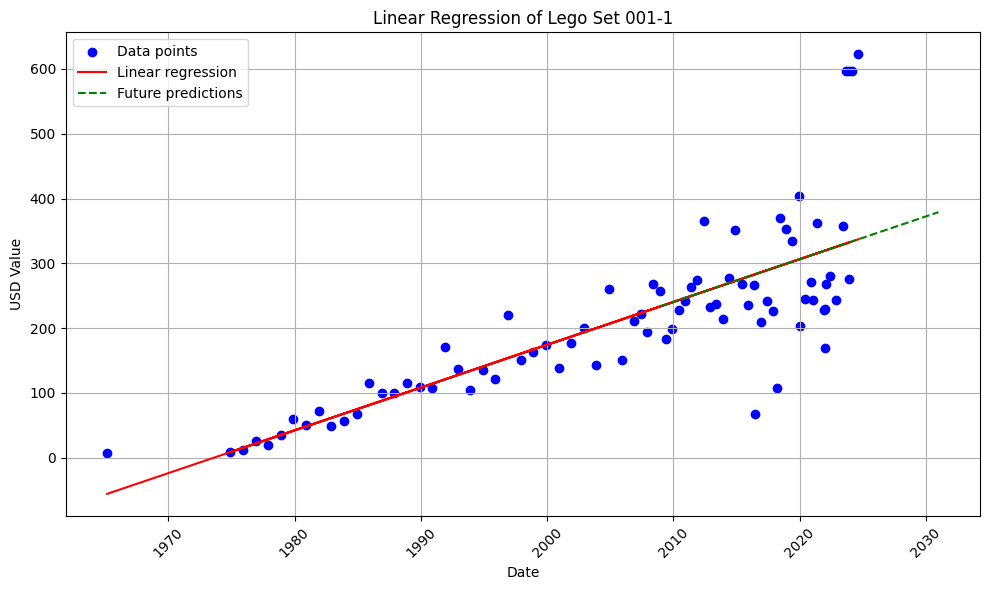

In [12]:
X = df_0011['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_0011['USD Value'].values

# Fit the model
model = LinearRegression().fit(X, y)

# Prepare future dates and predict
future_dates = pd.date_range('2008-12-31', '2030-12-31', freq='Y')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)

# Plotting, making sure to convert ordinal dates back to datetime for readability
plt.figure(figsize=(10, 6))
plt.scatter(df_0011['Date'], df_0011['USD Value'], color='blue', label='Data points')
plt.plot(df_0011['Date'], model.predict(X), color='red', label='Linear regression')
plt.plot(future_dates, future_predictions, color='green', label='Future predictions', linestyle='--')

plt.title('Linear Regression of Lego Set 001-1')
plt.xlabel('Date')
plt.ylabel('USD Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
def monte_carlo_simulation(data, days, iterations):
    # Convert to numpy array if data is a pandas Series
    if isinstance(data, pd.Series):
        data = data.to_numpy()

    # Ensure data is a numpy array
    if not isinstance(data, np.ndarray):
        raise TypeError("Data must be a numpy array or pandas Series")

    # Calculate log returns
    log_returns = np.log(data[1:] / data[:-1])
    mean = np.mean(log_returns)
    variance = np.var(log_returns)
    
    # Adjust the drift to use a smaller portion of the variance
    drift = mean - (0.05 * variance)
    daily_volatility = np.std(log_returns)

    future_prices = np.zeros((days, iterations))
    current_price = data[-1]
    for t in range(days):
        shocks = drift + daily_volatility * norm.ppf(np.random.rand(iterations))
        future_prices[t] = current_price * np.exp(shocks)
        current_price = future_prices[t]
    return future_prices

Text(0, 0.5, 'USD Value')

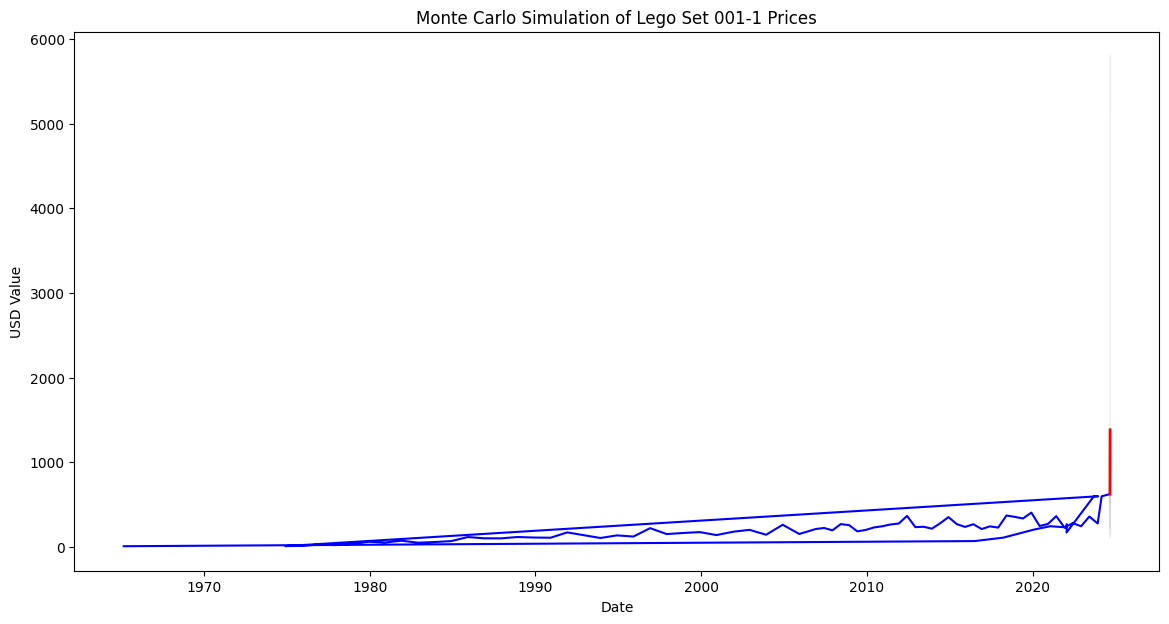

In [14]:
simulation_days = 3
mc_iterations = 5

mc_prices = monte_carlo_simulation(df_0011['USD Value'], simulation_days, mc_iterations)

last_close_price = df_0011['USD Value'].iloc[-1]
mc_prices = np.vstack([np.full(mc_iterations, last_close_price), mc_prices])

last_date = df_0011['Date'].iloc[-1]
simulation_dates = pd.date_range(start=last_date, periods=simulation_days + 1, freq='D')

plt.figure(figsize=(14, 7))
plt.plot(df_0011['Date'], df_0011['USD Value'], color='blue', label='Historical prices')
for i in range(mc_iterations):
    plt.plot(simulation_dates, mc_prices[:, i], color='grey', alpha=0.1)
mean_mc_path = np.mean(mc_prices, axis=1)
plt.plot(simulation_dates, mean_mc_path, color='red', linewidth=2, label='Mean Future Path')

plt.title('Monte Carlo Simulation of Lego Set 001-1 Prices')
plt.xlabel('Date')
plt.ylabel('USD Value')

0.999963804369964


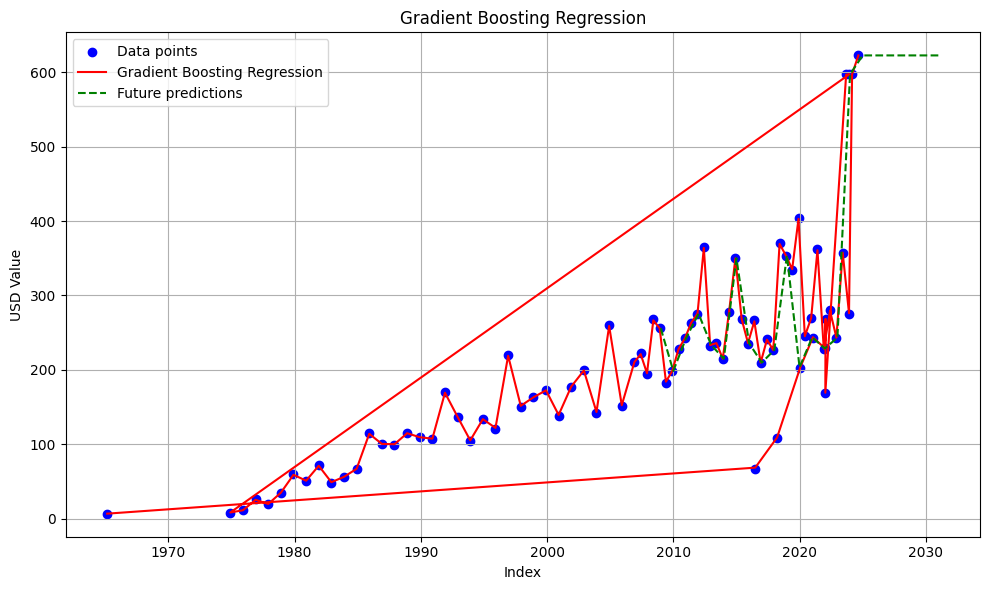

In [15]:
X = df_0011['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_0011['USD Value'].values

future_dates = pd.date_range('2008-12-31', '2030-12-31', freq='Y')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)

# Gradient Boosting Regression
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=2, random_state=0, loss='squared_error').fit(X, y)
print(model.score(X, y))
plt.figure(figsize=(10, 6))
plt.scatter(df_0011['Date'], df_0011['USD Value'], color='blue', label='Data points')
plt.plot(df_0011['Date'], model.predict(X), color='red', label='Gradient Boosting Regression')
plt.plot(future_dates, model.predict(future_dates_ordinal), color='green', label='Future predictions', linestyle='--')

plt.title('Gradient Boosting Regression')
plt.xlabel('Index')
plt.ylabel('USD Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# sort by date
df_0011.sort_values(by=['Date'], inplace=True)

# calculate gain per year
df_0011['Gain'] = df_0011.groupby(df_0011['Date'].dt.year)['USD Value'].pct_change()

df_0011.dropna(subset=['Gain'], inplace=True)

df_0011

/tmp/ipykernel_426510/2333222887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0011.sort_values(by=['Date'], inplace=True)
/tmp/ipykernel_426510/2333222887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0011['Gain'] = df_0011.groupby(df_0011['Date'].dt.year)['USD Value'].pct_change()
/tmp/ipykernel_426510/2333222887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Date,USD Value,Set Description,Gain
48,2007-12-01,194.43,,-0.125174
50,2008-12-01,256.55,,-0.041902
52,2009-12-01,198.66,,0.088608
54,2010-12-01,242.44,,0.062076
56,2011-12-01,274.66,,0.041997
58,2012-12-01,232.23,,-0.363875
60,2013-12-01,214.29,,-0.094906
62,2014-12-01,350.64,,0.261749
64,2015-12-01,234.98,,-0.124842
5,2016-06-28,67.50,,-0.746726


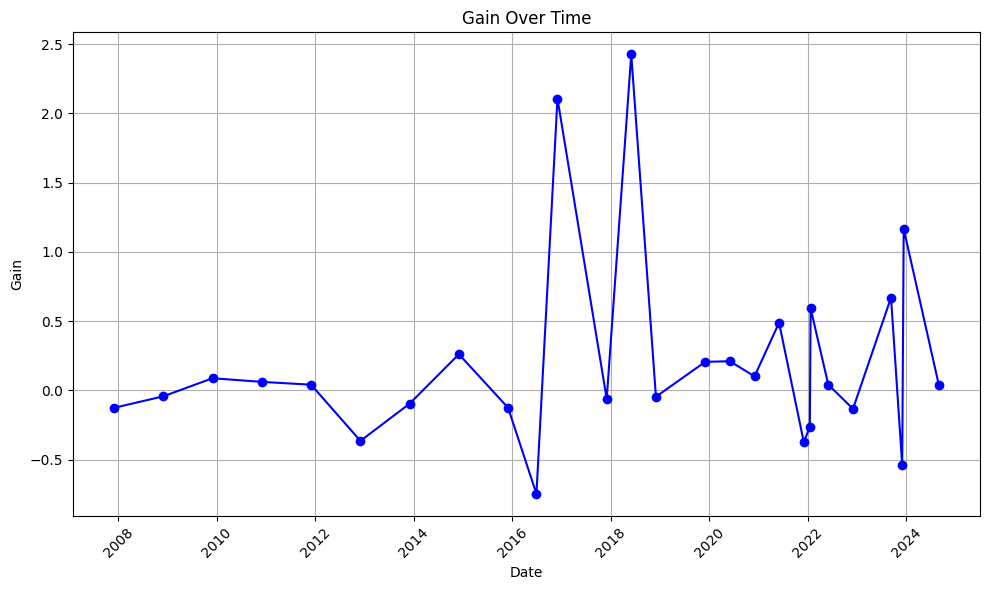

In [17]:
# Plot the gain over time
plt.figure(figsize=(10, 6))
plt.plot(df_0011['Date'], df_0011['Gain'], marker='o', linestyle='-', color='b')
plt.title('Gain Over Time')
plt.xlabel('Date')
plt.ylabel('Gain')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


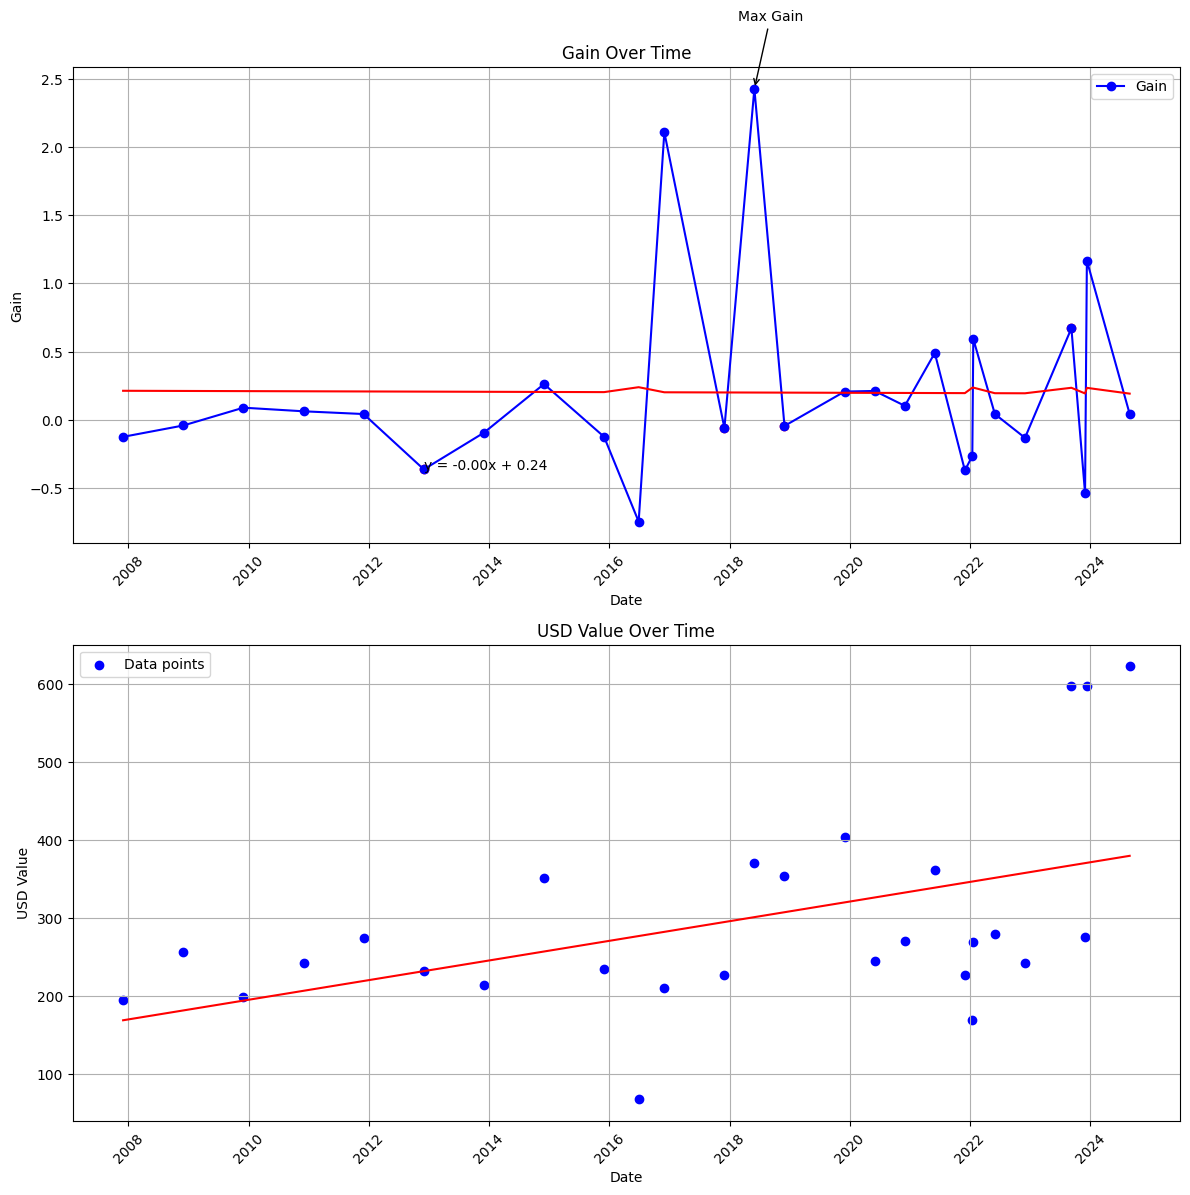

In [18]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot 1: Gain Over Time
axes[0].plot(df_0011['Date'], df_0011['Gain'], marker='o', linestyle='-', color='b', label='Gain')
axes[0].set_title('Gain Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Gain')
axes[0].grid(True)
axes[0].legend()

# Add trend line to the first plot
slope, intercept, r_value, p_value, std_err = stats.linregress(df_0011.index, df_0011['Gain'])
axes[0].plot(df_0011['Date'], intercept + slope * df_0011.index, color='red', label='Trend line')

# Annotate the trend line equation
axes[0].text(df_0011['Date'].iloc[5], df_0011['Gain'].iloc[5], f'y = {slope:.2f}x + {intercept:.2f}', fontsize=10, color='black')

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=45)

# Annotate the maximum gain if df_0011 is not empty
if not df_0011.empty:
    max_gain_index = df_0011['Gain'].idxmax()
    if not pd.isna(max_gain_index):
        max_gain_date = df_0011.loc[max_gain_index, 'Date']
        max_gain_value = df_0011.loc[max_gain_index, 'Gain']
        axes[0].annotate('Max Gain', xy=(max_gain_date, max_gain_value),
                         xytext=(max_gain_date - pd.Timedelta(days=100), max_gain_value + 0.5),
                         arrowprops=dict(facecolor='black', arrowstyle='->'))

# Highlight points of interest if df_0011 is not empty
if not df_0011.empty:
    points_of_interest_index = [5, 11, 13, 23]
    points_of_interest = df_0011.iloc[points_of_interest_index]
    axes[0].scatter(points_of_interest['Date'], points_of_interest['Gain'], color='red', label='Points of Interest')

# Plot 2: USD Value Over Time
axes[1].scatter(df_0011['Date'], df_0011['USD Value'], color='blue', label='Data points')
axes[1].set_title('USD Value Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('USD Value')
axes[1].legend()
axes[1].grid(True)

# Linear Regression for USD Value over Time
X = df_0011['Date'].astype(int).values.reshape(-1, 1)  # Convert datetime to numerical representation
y = df_0011['USD Value'].values
model = LinearRegression().fit(X, y)
axes[1].plot(df_0011['Date'], model.predict(X), color='red', label='Linear regression')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [19]:
df_0011_history = pd.read_csv("data/001-1_new.csv")

In [20]:
df_0011_history

,Date,Value 1,Value 2,Value 3,Value 4,Description
0,2009-01-01 00:00:00,427.14,443.22,491.44,523.59,January 2009 C$443.22 - C$491.44
1,2009-02-01 00:00:00,410.13,432.91,501.27,546.84,February 2009 C$432.91 - C$501.27
2,2009-03-01 00:00:00,403.71,418.91,464.49,494.87,March 2009 C$418.91 - C$464.49
3,2009-04-01 00:00:00,411.61,434.47,503.08,548.81,April 2009 C$434.47 - C$503.08
4,2009-05-01 00:00:00,430.28,446.48,495.06,527.44,May 2009 C$446.48 - C$495.06
...,...,...,...,...,...,...
177,2023-10-01 00:00:00,443.45,468.09,542.00,591.27,October 2023 C$468.09 - C$542.00
178,2023-11-01 00:00:00,504.06,523.03,579.93,617.87,November 2023 C$523.03 - C$579.93
179,2023-12-01 00:00:00,537.52,567.38,656.96,716.69,December 2023 C$567.38 - C$656.96
180,2024-01-01 00:00:00,542.86,563.29,624.58,665.44,January 2024 C$563.29 - C$624.58


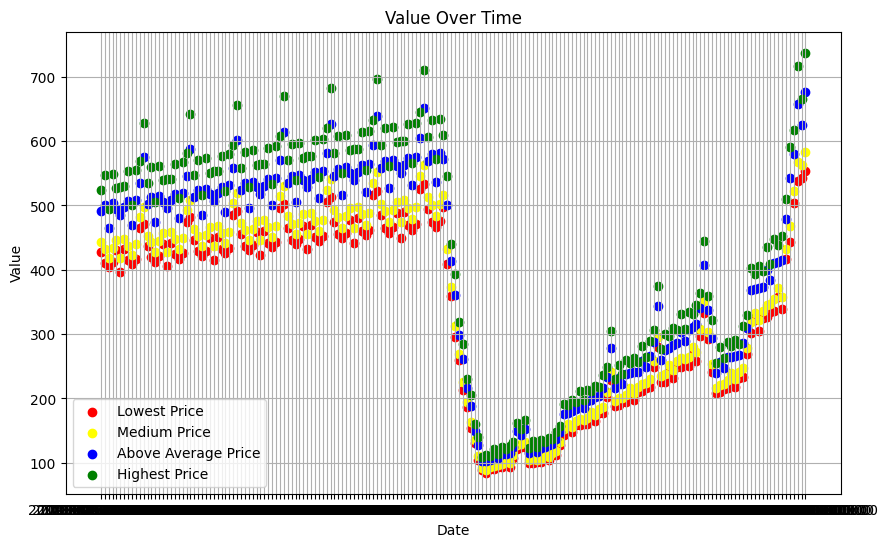

In [21]:
# Plot the model
plt.figure(figsize=(10, 6))
plt.scatter(df_0011_history.Date, df_0011_history['Value 1'], color='red', label='Lowest Price')
plt.scatter(df_0011_history.Date, df_0011_history['Value 2'], color='yellow', label='Medium Price')
plt.scatter(df_0011_history.Date, df_0011_history['Value 3'], color='blue', label='Above Average Price')
plt.scatter(df_0011_history.Date, df_0011_history['Value 4'], color='green', label='Highest Price')


plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X = df_0011_history['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_0011_history['Value 1'].values

future_dates = pd.date_range('2010-12-31', '2030-12-31', freq='Y')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_predictions = model.predict(future_dates_ordinal)

# Gradient Boosting Regression
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=2, random_state=0, loss='squared_error').fit(X, y)
print(model.score(X, y))
plt.figure(figsize=(10, 6))
plt.scatter(df_0011_history.Date, df_0011_history['Value 1'], color='blue', label='Data points')
plt.plot(df_0011_history.Date, model.predict(X), color='red', label='Gradient Boosting Regression')
plt.plot(future_dates, model.predict(future_dates_ordinal), color='green', label='Future predictions', linestyle='--')

plt.title('Value Over Time with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

TypeError: descriptor 'toordinal' for 'datetime.date' objects doesn't apply to a 'str' object

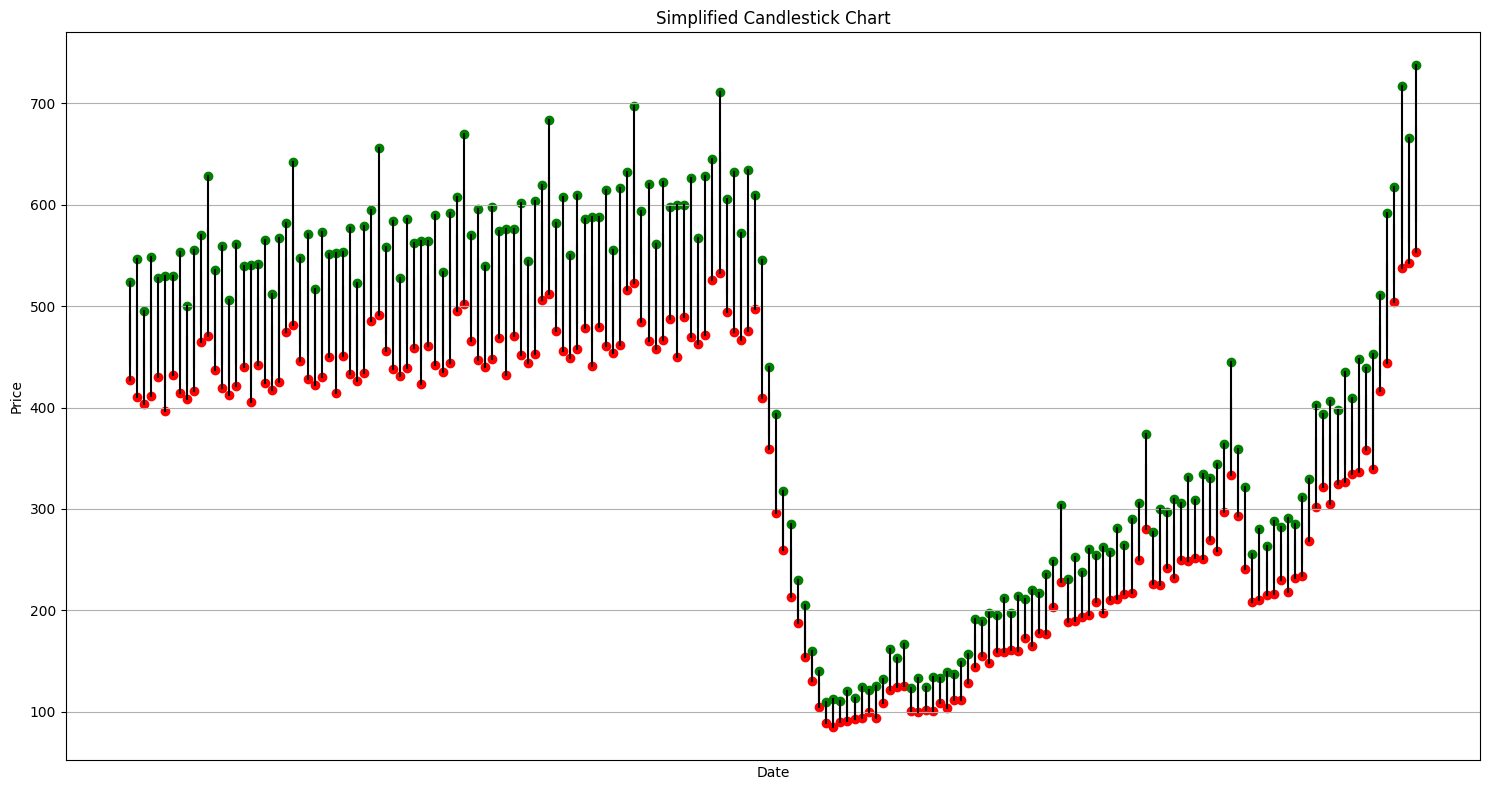

In [23]:
df_candle = df_0011_history[['Date', 'Value 1', 'Value 2', 'Value 3', 'Value 4']].copy()
df_candle.columns = ['Date', 'Lowest Price', 'Medium Price', 'Above Average Price', 'Highest Price']


df_candle['Date'] = pd.to_datetime(df_candle['Date'], errors='coerce')
df_candle.sort_values('Date', inplace=True)

# Plotting each 'candle'

plt.figure(figsize=(15, 8))

# Generating date ticks for cleaner x-axis
date_ticks = pd.date_range(start=df_candle['Date'].min(), end=df_candle['Date'].max(), periods=10)
plt.xticks(date_ticks, [date.strftime('%Y-%m-%d') for date in date_ticks], rotation=45)

# Define colors for different parts of the candle
color_high = 'green'
color_above_average = 'blue'
color_medium = 'yellow'
color_low = 'red'



# Plotting lines and markers for each 'candle'
for i in range(len(df_candle)):
    # Plot the high and low values
    plt.plot([i, i], [df_candle['Lowest Price'].iloc[i], df_candle['Highest Price'].iloc[i]], color='black')
    plt.plot([i, i], [df_candle['Above Average Price'].iloc[i], df_candle['Medium Price'].iloc[i]], color='black')
    plt.scatter(i, df_candle['Lowest Price'].iloc[i], color=color_low, marker='o')
    plt.scatter(i, df_candle['Highest Price'].iloc[i], color=color_high, marker='o')

plt.title('Simplified Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()